In [1]:
import time
print(time.ctime(time.time()))

Sun Dec  7 17:28:31 2025


# Advent of Code Day 4

Puzzle text available at:
https://adventofcode.com/2025/day/4

In [2]:
import os
import numpy as np
import io
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

In [3]:
# Day of calendar
day = 4

In [4]:
# Set path to input
input_dir = Path(os.path.abspath('')).parent

In [5]:
filepath = os.path.join(input_dir,'inputs','input_day%02d.txt' %(day))
with open(filepath, 'r') as f:
    problem_input = []
    for line in f:
        problem_input.append(list(line.strip()))
grid = np.array(problem_input)
padded_grid = np.pad(grid, pad_width=1, mode='constant', constant_values='#')

## Part 2

In [6]:
# Indexing for all neighbors at once
directions = [(-1,-1), (-1,0), (-1,1), (0,-1), (0,1), (1,-1), (1,0), (1,1)]

# Grid to control rolls to be removed
removed_grid = padded_grid.copy()
# Grid on which the rolls will be removed
iter_grid = padded_grid.copy()
iter_bool_grid = iter_grid == '@'
# Grid that will record the changes


# Init var
post_rolls = np.sum(iter_bool_grid)
result_part2 = 0 
track_changes = [iter_grid.copy()]

# Loop until we cannot remove any more rolls
while True:
    previous_rolls = post_rolls

    # Neighbour loop
    for i in range(1, iter_bool_grid.shape[0]-1):
        for j in range(1, iter_bool_grid.shape[1]-1):
            if iter_bool_grid[i,j]: # Only check when there's a roll
                n_neighbour = sum(iter_bool_grid[i+di, j+dj] for di, dj in directions)
                if n_neighbour < 4:
                    result_part2 += 1
                    removed_grid[i,j] = 'X'

    # Remove rolls and update grids
    iter_grid[removed_grid == 'X'] = '.'
    iter_bool_grid = iter_grid == '@'
    track_changes.append(removed_grid.copy())
    removed_grid = iter_grid.copy()
    post_rolls = np.sum(iter_grid == '@')
    track_changes.append(iter_grid.copy())
    
    # Rolls removed check
    if post_rolls >= previous_rolls:
        break

print(f'Result check = {result_part2==10132}')

Result check = True


In [7]:
plot_grid = np.array(track_changes).transpose(2, 1, 0)[1:-1, 1:-1, :]
print(plot_grid.shape)
xg = np.arange(plot_grid.shape[0])
yg = np.arange(plot_grid.shape[1])

(140, 140, 121)


In [8]:
# Give numeric values for coloring
numeric_grid = np.zeros_like(plot_grid, dtype=int)
numeric_grid[plot_grid == '.'] = 0
numeric_grid[plot_grid == '@'] = 1
numeric_grid[plot_grid == 'X'] = 2

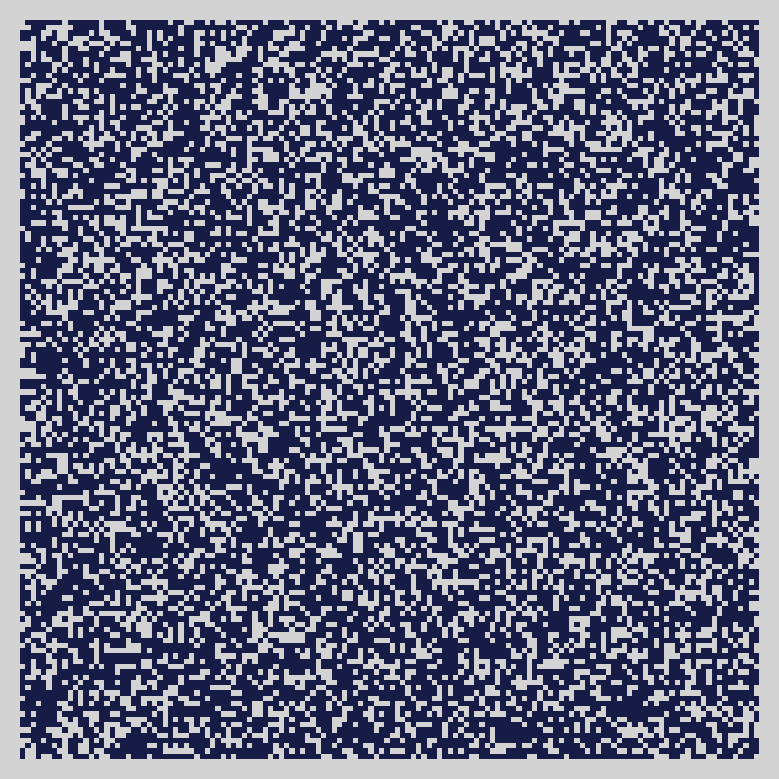

In [9]:
fig, ax = plt.subplots(dpi=200)
fig.set_facecolor('lightgray')
colors = ['lightgray', '#171C46', '#FF3C3C']  # '.', '@', 'X'
cmap = plt.matplotlib.colors.ListedColormap(colors)

frames = []

for i in range(plot_grid.shape[2]):
    ax.clear()
    ax.set_facecolor('lightgray')
    
    mesh = ax.pcolormesh(xg, yg, numeric_grid[:,:,i], cmap=cmap, 
                         linewidth=0.5, vmin=0, vmax=2)
    ax.set_aspect('equal')
    ax.axis('off')
    
    # Convert plot to image
    buf = io.BytesIO()
    plt.savefig(buf, format='png', facecolor='lightgray', bbox_inches='tight')
    buf.seek(0)
    frames.append(Image.open(buf).copy())
    buf.close()

plt.close()

# Save as GIF
fname = 'aoc2025_day04_part2.gif'
frames[0].save(fname, 
               save_all=True, 
               append_images=frames[1:], 
               duration=200,  # milliseconds per frame
               loop=0)  # 0 = loop forever

# Display in Jupyter
from IPython.display import Image as IPImage, display
display(IPImage(filename=fname))